<a href="https://colab.research.google.com/github/RandivCosta/data-analysis/blob/main/temporal_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# temporal analysis

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
df = pd.read_csv("adjusted_data.csv")

sites = sorted(df['Site'].unique())
areas = sorted(df['Area'].unique())
# convert week column into a numerical column
df['Week'] = pd.factorize(df['Week'])[0] + 1

### trends of bacterial counts over 10 weeks

## trends of bacterial count over 10 weeks separetly for seawater and sand for each site (lineplots)

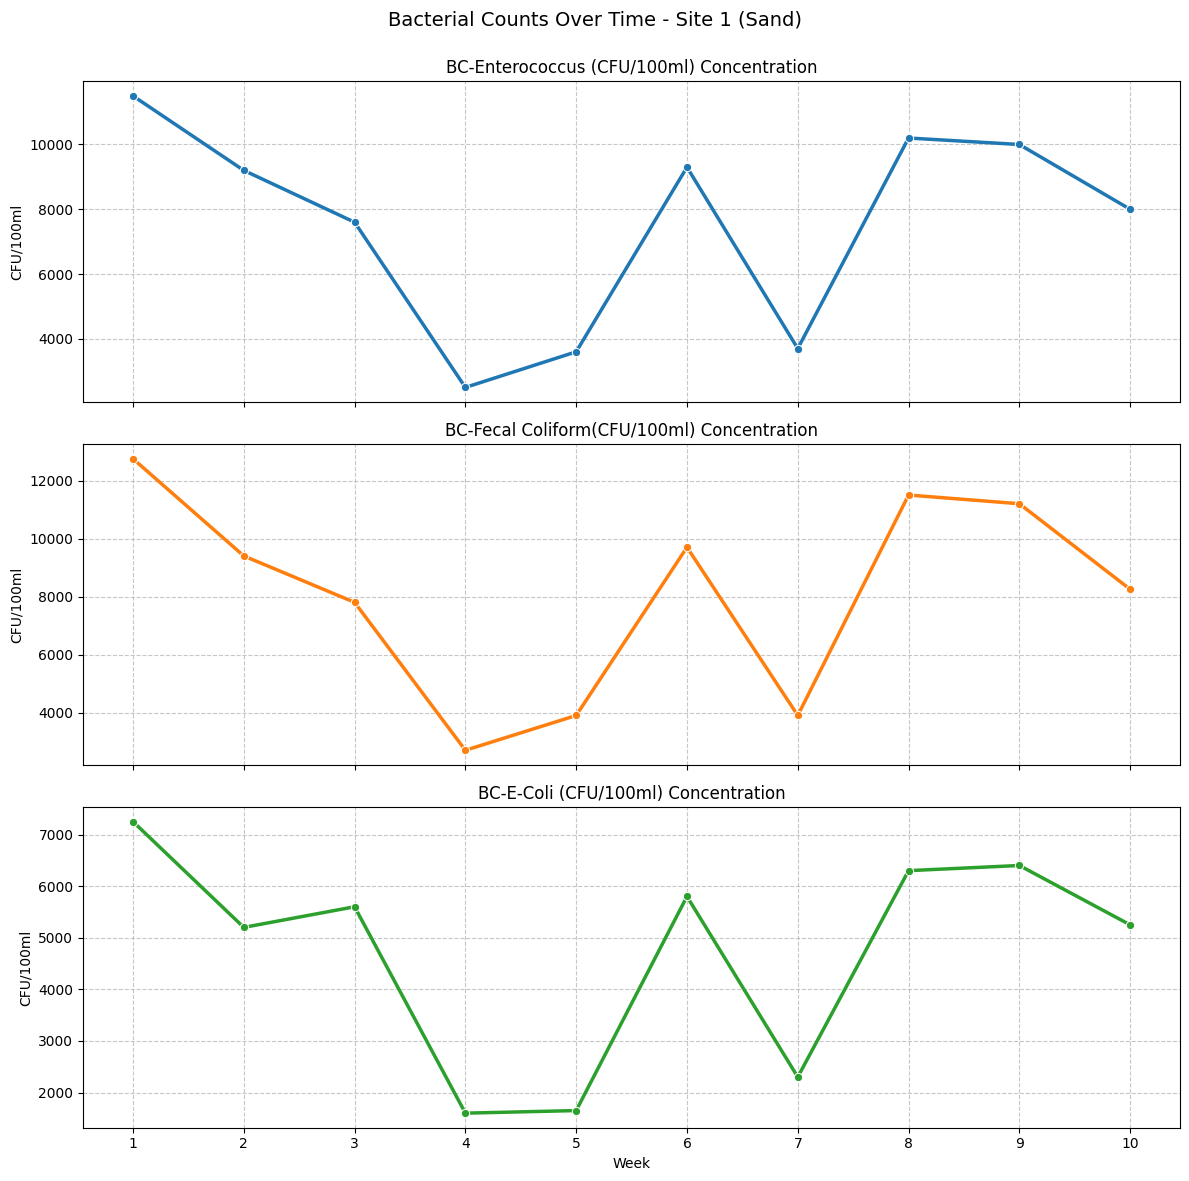

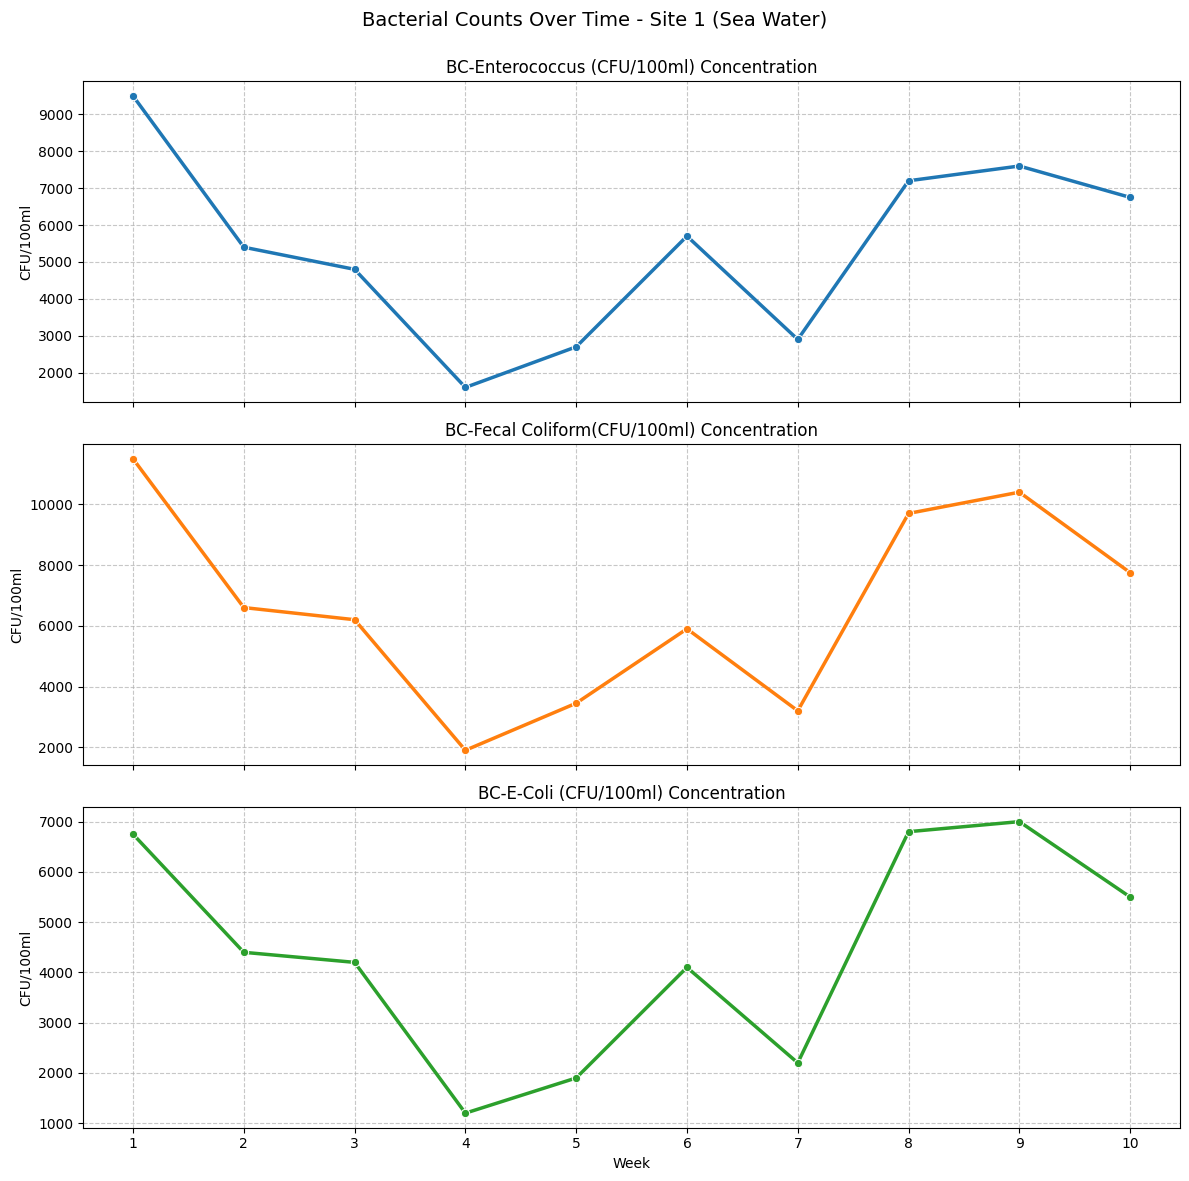

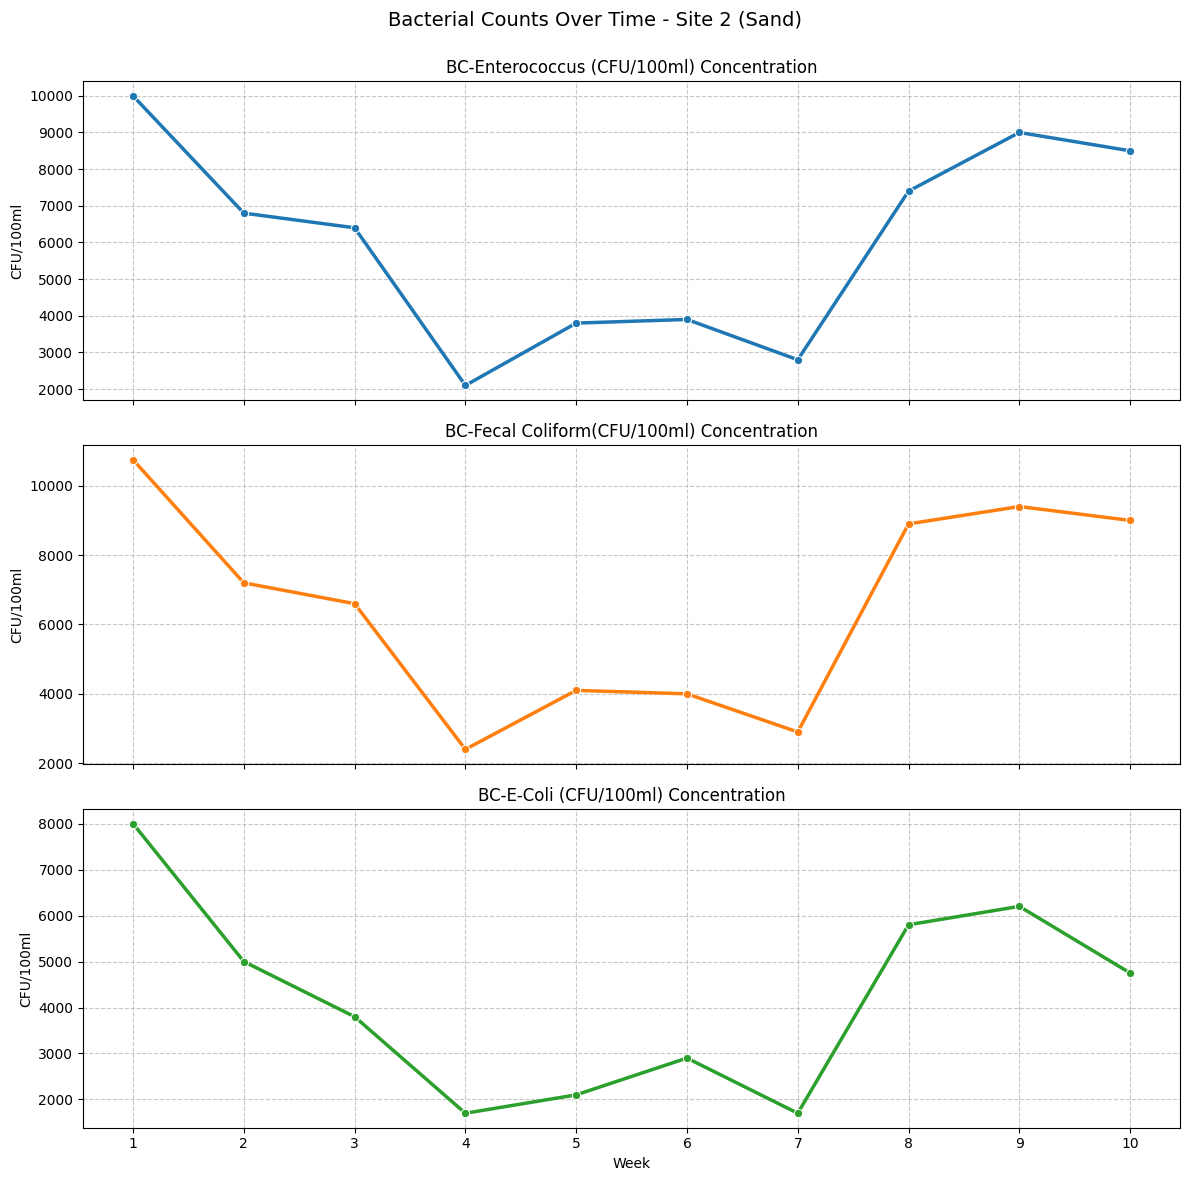

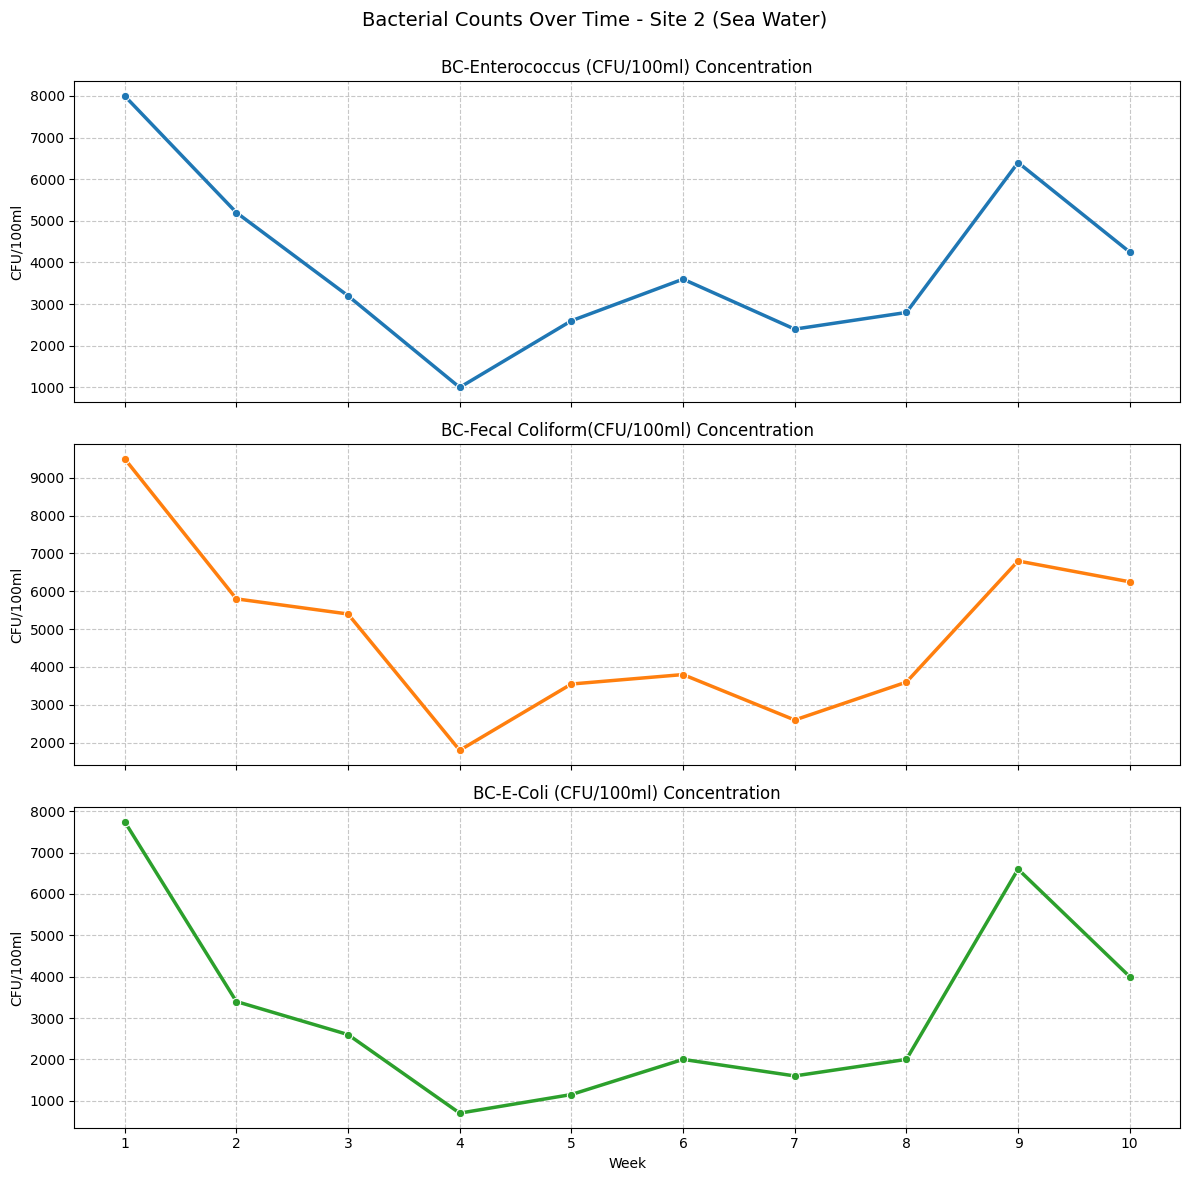

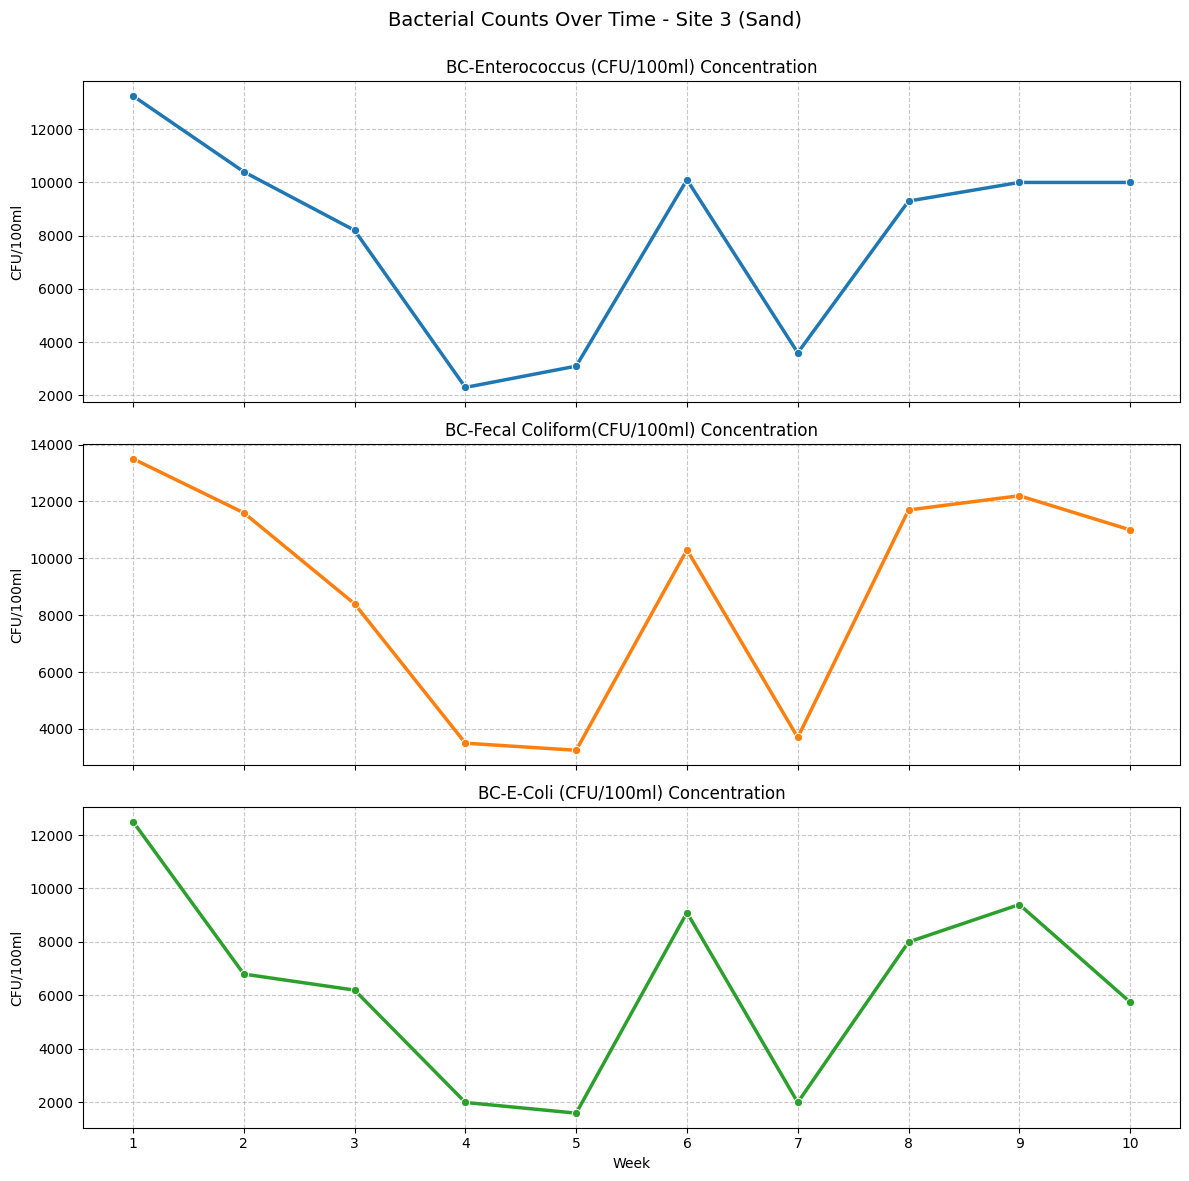

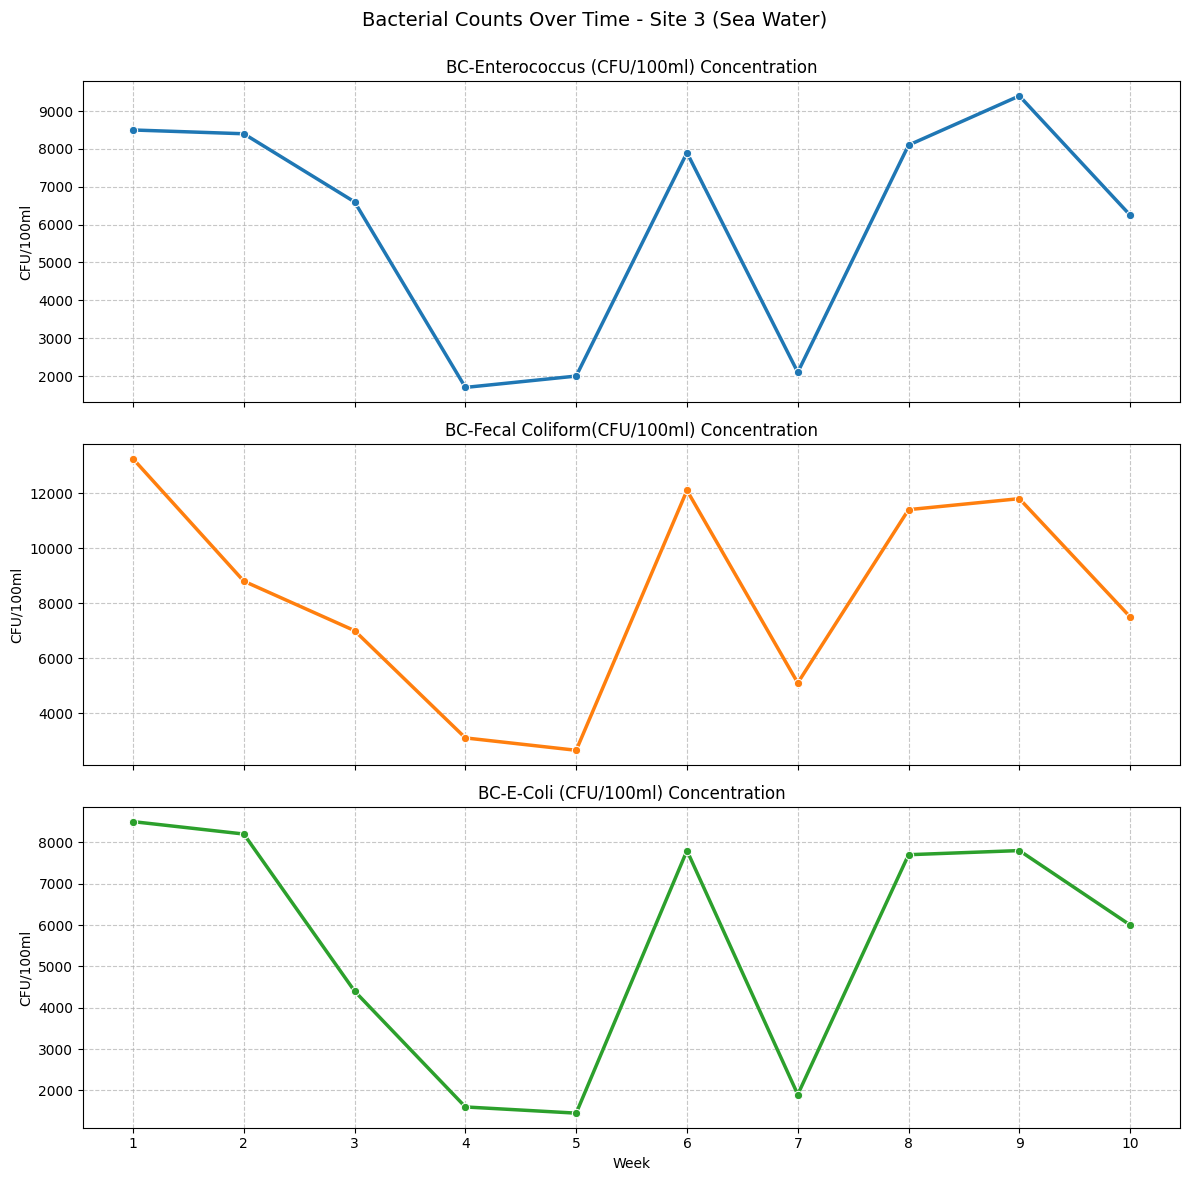

In [ ]:
for site in sites:
    for area in areas:
        filtered_df = df[(df['Site'] == site) & (df['Area'] == area)]
        if not filtered_df.empty:
            ts = filtered_df.iloc[:,[0,3,4,5]]

            ## lineplots for 3 bacteria in one plot
            #melt dataframe for easier plotting with seaborn
            melted_df = ts.melt(id_vars='Week', var_name='Bacteria', value_name='CFU/100ml')

            plt.figure(figsize=(10, 6))
            sns.lineplot(data=melted_df,  x='Week',  y='CFU/100ml',  hue='Bacteria', marker='o', linewidth=2.5)
            plt.title(f'Bacterial Counts Over Time - {site} ({area})')
            plt.xlabel('Weeks')
            plt.ylabel('CFU/100ml BC')
            plt.xticks(range(1, 11))
            plt.grid(True, which="both", ls="--")
            plt.legend(title='Bacteria Type')
            plt.tight_layout()
            plt.show()
            # plt.savefig(f'bacterial_trends_{site}_{area}.png', dpi=300)
            # plt.close()

            ## lineplots for 3 bacteria in 3 separate plots
            # create figure with 3 subplots
            fig, axes = plt.subplots(3, 1, figsize=(12, 12), sharex=True)
            # bacteria columns to plot
            bacteria_cols = ts.columns[1:]

            # plot each bacteria in separate subplot
            for i, bacteria in enumerate(bacteria_cols):
                sns.lineplot(data=ts,
                             x='Week',
                             y=bacteria,
                             ax=axes[i],
                             marker='o',
                             color=sns.color_palette()[i],
                             linewidth=2.5)

                axes[i].set_title(f'{bacteria} Concentration')
                axes[i].set_ylabel('CFU/100ml')
                axes[i].grid(True, linestyle='--', alpha=0.7)

                # axes[i].set_yscale('log')

                # x ticks to show all weeks
                axes[i].set_xticks(range(1, 11))

            # common x label for all subplots
            axes[-1].set_xlabel('Week')
            fig.suptitle(f'Bacterial Counts Over Time - {site} ({area})', fontsize=14)

            plt.tight_layout(rect=[0, 0, 1, 0.98])
            plt.show()
            # fig.savefig(f'bacterial_trends_subplots_{site}_{area}.png', dpi=300, bbox_inches='tight')
            # plt.close(fig)



## bacterial trends for each bacteria across all sites, using mean in 3 sites within a week, for separatley sand and seawater


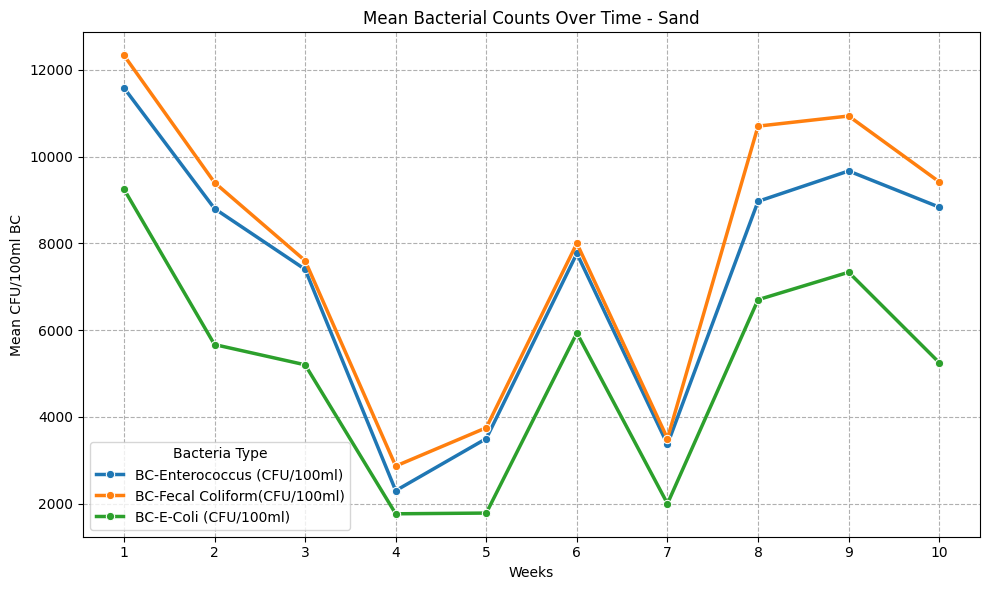

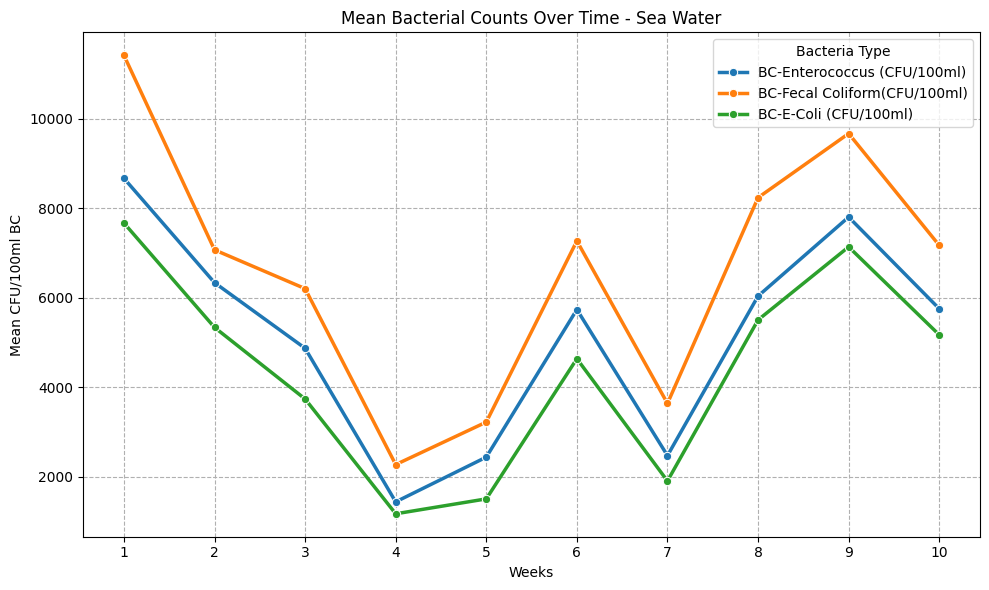

In [ ]:
for area in areas:
    area_df = df[df['Area'] == area]
    if not area_df.empty:
        area_ts = area_df.iloc[:,[0,3,4,5]]
        # calculate mean of bacteria across all sites for 10 weeks
        weekly_mean_df = area_ts.groupby('Week').mean().reset_index()
        # print(weekly_mean_df)

        ## lineplots for 3 bacteria in one plot
        #melt dataframe for easier plotting with seaborn
        melted_weekly_mean = weekly_mean_df.melt(id_vars='Week', var_name='Bacteria', value_name='CFU/100ml')

        plt.figure(figsize=(10, 6))
        sns.lineplot(data=melted_weekly_mean,  x='Week',  y='CFU/100ml',  hue='Bacteria', marker='o', linewidth=2.5)
        plt.title(f'Mean Bacterial Counts Over Time - {area}')
        plt.xlabel('Weeks')
        plt.ylabel('Mean CFU/100ml BC')
        plt.xticks(range(1, 11))
        plt.grid(True, which="both", ls="--")
        plt.legend(title='Bacteria Type')
        plt.tight_layout()
        plt.show()
        # plt.savefig(f'bacterial_trends_allsites_mean_{area}.png', dpi=300)
        # plt.close()

## Trends of environmental parameters over 10 weeks

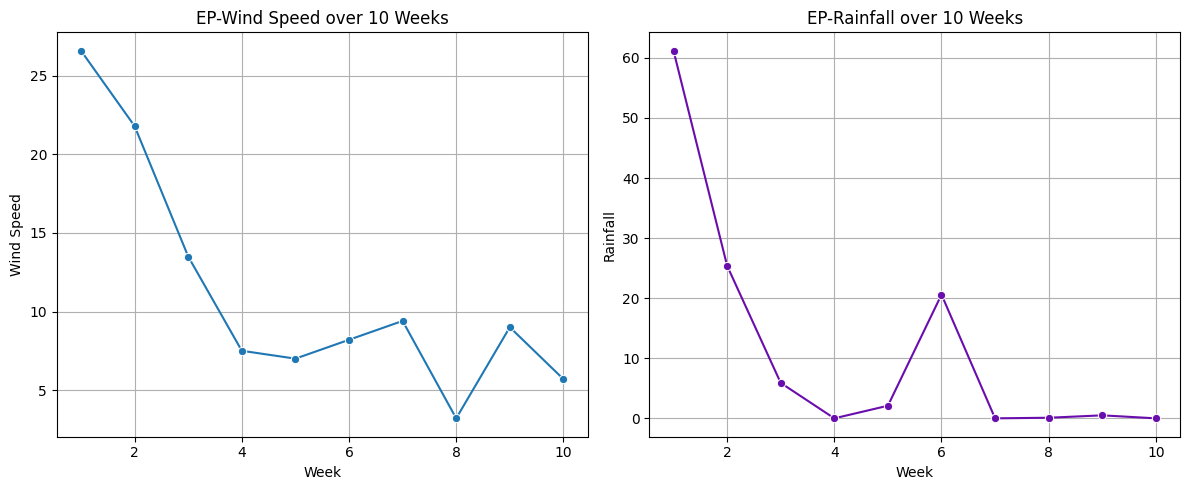

In [ ]:
# ep values for both seawater and sand are same within all sites for a selected week
# so only need to find trend of ep over time for all the sites

ep_df_all = df.iloc[:,[0,-1,-2]]
ep_df = ep_df_all.drop_duplicates() # drop all the duplicate rows

ep_names = ep_df.columns[ep_df.columns.str.contains('EP-')].tolist()
# trends in 2 different subplots
colors = ["#1f77b4", "#6a0dad"]
# set up the figure and subplots
plt.figure(figsize=(12, 5))

for i, ep in enumerate(ep_names, 1):
    plt.subplot(1, 2, i)  # 1 row, 2 columns, current subplot position
    sns.lineplot(data=ep_df, x='Week', y=ep, marker='o', color=colors[i-1])
    plt.title(f'{ep} over 10 Weeks', fontsize=12)
    plt.xlabel('Week')
    plt.ylabel(ep.split("-")[-1], fontsize=10)
    plt.grid(True)

plt.tight_layout()  # Adjust spacing between subplots
plt.show()
# plt.savefig(f'ep_trends_rainfall_and_wind.png', dpi=300)
# plt.close()

### both trends in oneplot

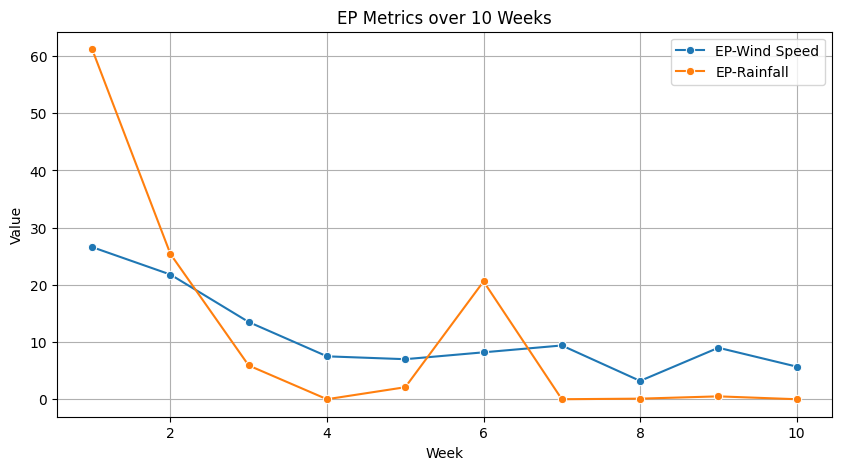

In [ ]:
plt.figure(figsize=(10, 5))
for ep in ep_names:
    sns.lineplot(data=ep_df, x='Week', y=ep, marker='o', label=ep)
plt.title('EP Metrics over 10 Weeks')
plt.xlabel('Week')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()
# plt.savefig(f'ep_trends_rainfall_and_wind_inOneplot.png', dpi=300)
# plt.close()